# FAKE_NEWS ANALYSIS BY DAVID OLUTUNDE DANIEL

The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE. The dataset takes up 29.2MB of space

# Questions to Ask

Do you trust all the news you hear from social media?

All news are not real, right?

How will you detect fake news?



In [105]:
#You’ll need to install the following libraries with pip:
#pip install numpy pandas sklearn
#You’ll need to install Jupyter Lab to run your code. Get to your command prompt and run the following command:
#C:\Users\DataFlair>jupyter lab

In [143]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
#WE WRANGLE THE DATA
#Read the data
df = pd.read_csv('/home/psalmist/Documents/Python/Data_Science_Project/news.csv')

In [108]:
#Here we want to get the shape and the head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [109]:
#EXPLORING THE DATA
#To get the labels from the DataFrame
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [110]:
df.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


Most of the data that we come across has missing data. We’ll check for missing data, also visualize them to get a better idea and remove them.

<AxesSubplot:>

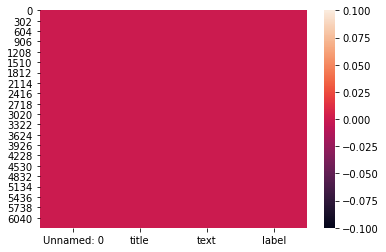

In [111]:
sns.heatmap(df.isnull())

Here, we find boolean values. True indicating that the value is null and False the vice versa. Since there are a lot of data, we use the seaborn library to visualize the null values. In that case, our task becomes much easier.

In [112]:
#sns.countplot(x='V2',data=df)   #This is too much of data, it may froze your system

# Data Exploration
In this section of the fraud detection ML project, we will explore the data that is contained in the creditcard_data dataframe. We will proceed by displaying the creditcard_data using the head() function as well as the tail() function. We will then proceed to explore the other components of this dataframe –

In [113]:
df.shape

(6335, 4)

In [114]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [115]:
#To get the column names on the dataset
print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [116]:
#or
print(df.keys())

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


Displaying Data Types

The first step in getting to know your data is to discover the different data types it contains. While you can put anything into a list, the columns of a DataFrame contain values of a specific data type. When you compare Pandas and Python data structures, you’ll see that this behavior makes Pandas much faster!

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [118]:
#checking if there's any missing value
df.isnull().values.sum()

0

In [119]:
#Checking how many Frauds there are as well as the percentage of Fraudulent and Normal Transactions

Number_of_Fake_News=  df['label'].value_counts()[1]
Number_of_NonFake_News = df['label'].value_counts()[0]


print("Number of Fake_News Values: {}".format(Number_of_Fake_News))
print("Number of  Real_News Values: {}".format(Number_of_NonFake_News))
print("\n")
print("Percentage of Fake_News Transactions: {}".format(round(Number_of_Fake_News/len(df)*100,3)))
print("Percentage of Real_News Transactions: {}".format(round(Number_of_NonFake_News/len(df)*100,3)))

Number of Fake_News Values: 3164
Number of  Real_News Values: 3171


Percentage of Fake_News Transactions: 49.945
Percentage of Real_News Transactions: 50.055


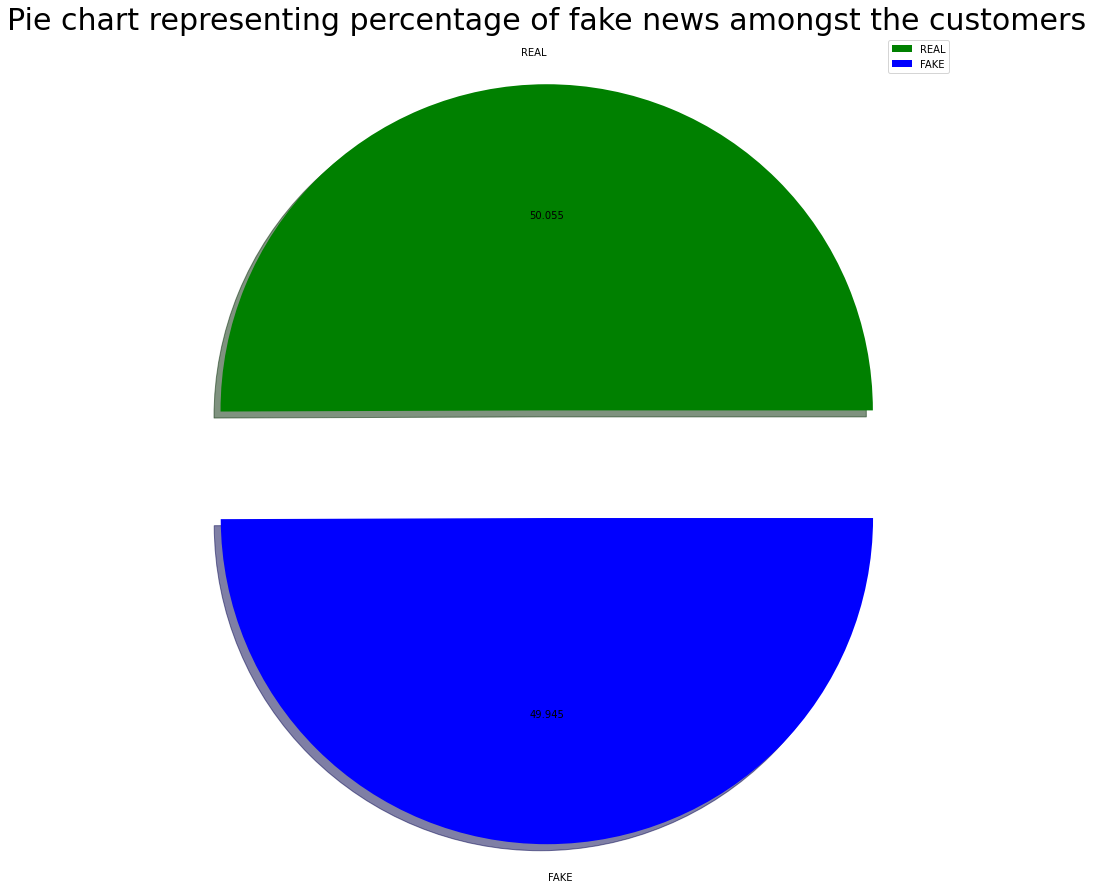

In [120]:
labels = ['REAL', 'FAKE']
colors = ['green', 'blue']
size = [3171, 3164]
explode = [0.1, 0.23]

plt.rcParams['figure.figsize'] = (15, 15)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%.3f', shadow = True)
plt.title('Pie chart representing percentage of fake news amongst the customers', fontsize = 30)
plt.legend()
plt.show()

In [121]:
# converting to binary data
df_one = pd.get_dummies(df["label"])
print(df_one)

y= df.label
X = df.drop('label',axis=1)

      FAKE  REAL
0        1     0
1        1     0
2        0     1
3        1     0
4        0     1
...    ...   ...
6330     0     1
6331     1     0
6332     1     0
6333     0     1
6334     0     1

[6335 rows x 2 columns]


In [68]:
#splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
 
#printing shapes of testing and training sets :
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (5068, 3)
shape of output - training set (5068,)
shape of input - testing set (1267, 3)
shape of output - testing set (1267,)


In [69]:
X.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [122]:
#df_new = df.rename(columns={'Customer_No': 'Unnamed: 0'})
#print(df_new)
df = df.rename({'Unnamed: 0':'customer_number'})

In [123]:
print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

In [124]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [125]:
y.tail()

6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, dtype: object

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
data_frame = pd.DataFrame(data = y_train, columns=["label"])
print(data_frame)

      label
0         1
1         0
2         1
3         1
4         1
...     ...
5063      1
5064      0
5065      1
5066      0
5067      0

[5068 rows x 1 columns]


In [128]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [152]:
#get_dummy converts categorically values to binary
dummy = pd.get_dummies(df['label'])

In [153]:
dummy.head()

,FAKE,REAL
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


we have to decide to choose which of them to use or use the two of them. So, what to do now is to append/concatenate the dataset with the one we have before...

In [154]:
df1=pd.concat((df,dummy), axis =1)

In [155]:
df1

,Unnamed: 0,title,text,label,FAKE,REAL
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,1
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0,1


In [133]:
#Now we can drop the label column
#df2 = df2.drop(['label'], axis = 1)

In [156]:
#Let now one of the newly column, so we can have REAL=1, FAKE=0 or otherwise
#so we are dropping FAKE Column 
df1 = df1.drop(['FAKE'], axis = 1)

In [157]:
df1.head()

,Unnamed: 0,title,text,label,REAL
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [158]:
#Let rename REAL TO SEX, and Unnamed: 0 to Customer_number
df1 = df1.rename(columns={"REAL":"SEX", "Unnamed: 0": "Customer_number"})

In [159]:
df1

,Customer_number,title,text,label,SEX
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1


It is always a good practice to play around with the data and fully exploit the visualization libraries to have fun with the data.

<AxesSubplot:xlabel='SEX', ylabel='count'>

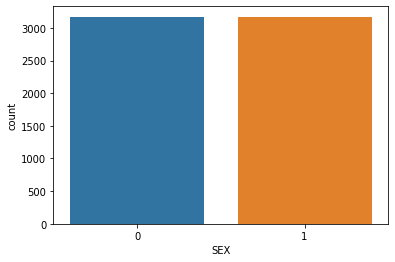

In [189]:
sns.countplot(x= 'SEX',data= df2)

This is a count plot that shows the number of people who survived the fake news (or obtain the real news) which is our target variable. Further, we can plot count plots on the basis of gender and passenger class.

<AxesSubplot:xlabel='SEX', ylabel='count'>

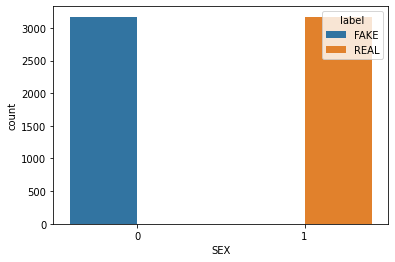

In [190]:
sns.countplot(x='SEX',hue='label',data= df1)

In [191]:
df1.drop(['title','text','label'],axis=1,inplace=True)

In [192]:
#sns.countplot(x='SEX',hue='Customer_number',data=df1)

In [193]:
#ANALYSE THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('SEX',axis=1), 
                                                    df1['SEX'], test_size=0.20, 
                                                    random_state=101)

In [194]:
y= df1.SEX

In [195]:
X = df1.drop('SEX',axis=1)

In [196]:
df1

,Customer_number,SEX
0,8476,0
1,10294,0
2,3608,1
3,10142,0
4,875,1
...,...,...
6330,4490,1
6331,8062,0
6332,8622,0
6333,4021,1


In [200]:
#from sklearn.linear_model import LogisticRegression
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)
#predictions = logmodel.predict(X_test)
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       653

    accuracy                           1.00      1267
   macro avg       1.00      1.00      1.00      1267
weighted avg       1.00      1.00      1.00      1267



# Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [203]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[614,   0],
       [  0, 653]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 614 and 653 are actual predictions, and 0 and 0 are incorrect predictions.

So with this model, we have 614 true positives, 653 true negatives, 0 false positives, and 0 false negatives.

# Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap

In [204]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

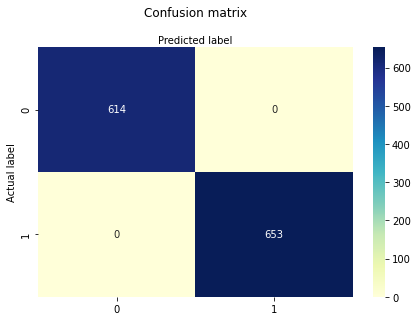

In [205]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [206]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Well, you got a classification rate of 100%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In this prediction case, when your Logistic Regression model predicted customer/people who are going to suffer from fake news, that patients have 100% of the time.

Recall: If there are patients who have fake news in the test set and your Logistic Regression model can identify it 100% of the time.

ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

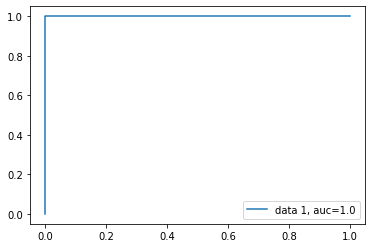

In [207]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 1.0. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

we learnt what the logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, you covered some basic concepts such as the confusion matrix, ROC curve.

# Summary
Today, we learned to detect fake news with Python. We took a political dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 100% in magnitude.